# BioDynamICS: Physiological Signal Processing Demo

This notebook demonstrates the use of the BioDynamICS physiological signal processing module to analyze clinical time series data from the MIMIC-III dataset.

## 1. Setup and Imports

In [1]:
import os
import sys

# Use the updated folder names
project_root = r"C:\Users\alex5\Documents\Projects\MIMIC_III\biodynamics"

# Add to Python's path if it's not already there
if project_root not in sys.path:
    sys.path.append(project_root)
    
# Print verification info
print(f"Project root added to path: {project_root}")
print(f"Project root exists: {os.path.exists(project_root)}")
print(f"src directory exists: {os.path.exists(os.path.join(project_root, 'src'))}")
print(f"__init__.py exists: {os.path.exists(os.path.join(project_root, 'src', '__init__.py'))}")

# Now try importing the modules
try:
    from src.data_integration import MimicPatientIntegrator
    from src.signal_processing import PhysiologicalSignalProcessor
    from src.visualization import ClinicalVisualizer
    print("All modules imported successfully!")
except Exception as e:
    print(f"Error importing modules: {e}")

Project root added to path: C:\Users\alex5\Documents\Projects\MIMIC_III\biodynamics
Project root exists: True
src directory exists: True
__init__.py exists: True
All modules imported successfully!


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Add the parent directory to path so we can import our modules
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Import our custom modules
from src.data_integration import MimicPatientIntegrator
from src.signal_processing import PhysiologicalSignalProcessor
from src.visualization import ClinicalVisualizer

# Configure visualization settings
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['font.size'] = 12

## 2. Load Patient Data

In [3]:
data_path = r"C:\Users\alex5\Documents\Projects\MIMIC_III\biodynamics\data\mimic-iii-clinical-database-demo-1.4"

print(f"Using data path: {data_path}")
print(f"Data path exists: {os.path.exists(data_path)}")

# Initialize data integrator
mimic = MimicPatientIntegrator(data_path)

# Check if a key file exists
patients_file = os.path.join(data_path, "PATIENTS.csv")
print(f"PATIENTS.csv exists: {os.path.exists(patients_file)}")

# Load core tables if the path exists
if os.path.exists(data_path):
    patient_stays = mimic.load_core_tables()
else:
    print("Data directory not found. Please check the path to your MIMIC-III data files.")

Using data path: C:\Users\alex5\Documents\Projects\MIMIC_III\biodynamics\data\mimic-iii-clinical-database-demo-1.4
Data path exists: True
[2025-03-15 17:28:03] Initialized MimicPatientIntegrator
PATIENTS.csv exists: True
[2025-03-15 17:28:03] Loaded PATIENTS: 100 rows
[2025-03-15 17:28:03] Loaded ADMISSIONS: 129 rows
[2025-03-15 17:28:03] Loaded ICUSTAYS: 136 rows
[2025-03-15 17:28:03] Created patient stays table: 136 rows


In [4]:
# Load additional data tables
print("Loading CHARTEVENTS in chunks...")
chartevents = mimic.load_chartevents_chunked(chunk_size=10000)

# Load other clinical tables
tables_to_load = [
    "LABEVENTS", "PRESCRIPTIONS", "MICROBIOLOGYEVENTS", 
    "OUTPUTEVENTS", "INPUTEVENTS_CV", "INPUTEVENTS_MV", 
    "PROCEDURES_ICD", "DIAGNOSES_ICD"
]

for table in tables_to_load:
    print(f"Loading {table}...")
    mimic.load_table(table)

Loading CHARTEVENTS in chunks...
[2025-03-15 17:28:06] Processing CHARTEVENTS.csv (74.1 MB)
[2025-03-15 17:28:06] Processed chunk 1 with 10000 rows. Total: 10000 rows
[2025-03-15 17:28:06] Processed chunk 2 with 10000 rows. Total: 20000 rows
[2025-03-15 17:28:06] Processed chunk 3 with 10000 rows. Total: 30000 rows
[2025-03-15 17:28:06] Processed chunk 4 with 10000 rows. Total: 40000 rows
[2025-03-15 17:28:06] Processed chunk 5 with 10000 rows. Total: 50000 rows
[2025-03-15 17:28:06] Processed chunk 6 with 10000 rows. Total: 60000 rows
[2025-03-15 17:28:06] Processed chunk 7 with 10000 rows. Total: 70000 rows
[2025-03-15 17:28:06] Processed chunk 8 with 10000 rows. Total: 80000 rows
[2025-03-15 17:28:06] Processed chunk 9 with 10000 rows. Total: 90000 rows
[2025-03-15 17:28:06] Processed chunk 10 with 10000 rows. Total: 100000 rows
[2025-03-15 17:28:06] Processed chunk 11 with 10000 rows. Total: 110000 rows
[2025-03-15 17:28:06] Processed chunk 12 with 10000 rows. Total: 120000 rows
[2

C:\Users\alex5\Documents\Projects\MIMIC_III\biodynamics\src\data_integration.py:42: DtypeWarning: Columns (17,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  self.tables[table_name] = pd.read_csv(file_path)


## 3. Create Patient Timeline

In [52]:
# Get a sample patient ID
# (This could be any patient with sufficient data)
sample_patient_id = mimic.tables['PATIENTS']['subject_id'].iloc[1]

# Create timeline for the patient
print(f"Creating timeline for patient {sample_patient_id}...")
patient_timeline = mimic.create_patient_timeline(sample_patient_id)

# Display basic patient info
print("\nPatient Information:")
for key, value in patient_timeline['info'].items():
    print(f"{key}: {value}")

# Show a sample of the timeline
print("\nTimeline sample:")
timeline_df = patient_timeline['timeline']
print(f"Total events: {len(timeline_df)}")
print(f"Event types: {timeline_df['event_type'].value_counts().to_dict()}")
timeline_df.head()

Creating timeline for patient 10011...
[2025-03-15 18:01:28] Created timeline for patient 10011 with 12318 events

Patient Information:
subject_id: 10011
gender: F
dob: 2090-06-05 00:00:00
dod: 2126-08-28 00:00:00
expire_flag: 1
admissions: 1
icustays: 1

Timeline sample:
Total events: 12318
Event types: {'chart': 11618, 'lab': 700}


,row_id,subject_id,hadm_id,icustay_id,itemid,charttime,storetime,cgid,value,valuenum,valueuom,warning,error,resultstatus,stopped,measurement_time,event_type,flag
102071,85803818,10011,105331.0,232110.0,27,2126-08-14 21:00:00,2126-08-14 21:58:00,21570.0,Soft Distended,NaN,NaN,NaN,NaN,NaN,NotStopd,2126-08-14 21:00:00,chart,NaN
102134,85803881,10011,105331.0,232110.0,1046,2126-08-14 21:00:00,2126-08-14 21:58:00,21570.0,No,NaN,NaN,NaN,NaN,NaN,NotStopd,2126-08-14 21:00:00,chart,NaN
102133,85803880,10011,105331.0,232110.0,763,2126-08-14 21:00:00,2126-08-15 00:39:00,21570.0,57.700000762939453,57.700001,kg,NaN,NaN,NaN,NotStopd,2126-08-14 21:00:00,chart,NaN
102132,85803879,10011,105331.0,232110.0,742,2126-08-14 21:00:00,2126-08-14 21:58:00,21570.0,1,1.000000,kg,NaN,NaN,NaN,NotStopd,2126-08-14 21:00:00,chart,NaN
102131,85803878,10011,105331.0,232110.0,733,2126-08-14 21:00:00,2126-08-15 00:39:00,21570.0,0,0.000000,kg,NaN,NaN,NaN,NotStopd,2126-08-14 21:00:00,chart,NaN


## 4. Initialize the Signal Processor

In [53]:
# Create the physiological signal processor
signal_processor = PhysiologicalSignalProcessor()

# Initialize the clinical visualizer
visualizer = ClinicalVisualizer()

Initialized PhysiologicalSignalProcessor
- 29 clinical measures with reference ranges
- 8 organ systems defined
- 41 MIMIC itemIDs mapped to standard names
Initialized ClinicalVisualizer


## 5. Extract Time Domain Features from a Vital Sign

In [54]:
# Let's work with heart rate as an example
# First, filter the timeline for chart events that represent heart rate
if 'itemid' in timeline_df.columns:
    # Get heart rate measurements using itemid mapping
    heart_rate_itemids = [211, 220045]  # MIMIC heart rate item IDs
    heart_rate_data = timeline_df[timeline_df['itemid'].isin(heart_rate_itemids)].copy()
    
    # Convert to time series
    heart_rate_data['measurement_time'] = pd.to_datetime(heart_rate_data['charttime'])
    heart_rate_series = pd.Series(
        heart_rate_data['valuenum'].values,
        index=heart_rate_data['measurement_time']
    ).sort_index()
elif 'heart_rate' in timeline_df.columns:
    # If we already have a heart_rate column
    heart_rate_data = timeline_df[['measurement_time', 'heart_rate']].dropna(subset=['heart_rate'])
    heart_rate_series = pd.Series(
        heart_rate_data['heart_rate'].values,
        index=pd.to_datetime(heart_rate_data['measurement_time'])
    ).sort_index()
else:
    print("Heart rate data not available for this patient")
    heart_rate_series = None

# If we have heart rate data, extract time domain features
if heart_rate_series is not None and len(heart_rate_series) > 10:
    # Calculate stability metrics
    stability_metrics = signal_processor.calculate_stability_metrics(
        heart_rate_series, 'heart_rate'
    )
    
    # Display stability metrics
    print("\nStability Metrics for Heart Rate:")
    for key, value in stability_metrics.items():
        print(f"{key}: {value}")
    
    # If we have enough data points, calculate sample entropy
    if len(heart_rate_series) >= 100:
        sample_entropy = signal_processor.calculate_sample_entropy(heart_rate_series.values)
        print(f"\nSample Entropy: {sample_entropy}")
        print("(Lower values indicate more regularity, higher values indicate more complexity/randomness)")


Stability Metrics for Heart Rate:
autocorr_lag1: 0.8853061283842865
autocorr_decay: 0.12957156559405947
sample_entropy: 1.288270200404326
rmssd: 8.639233972775806
pnn50: 93.7062937062937

Sample Entropy: 1.0316808282918748
(Lower values indicate more regularity, higher values indicate more complexity/randomness)


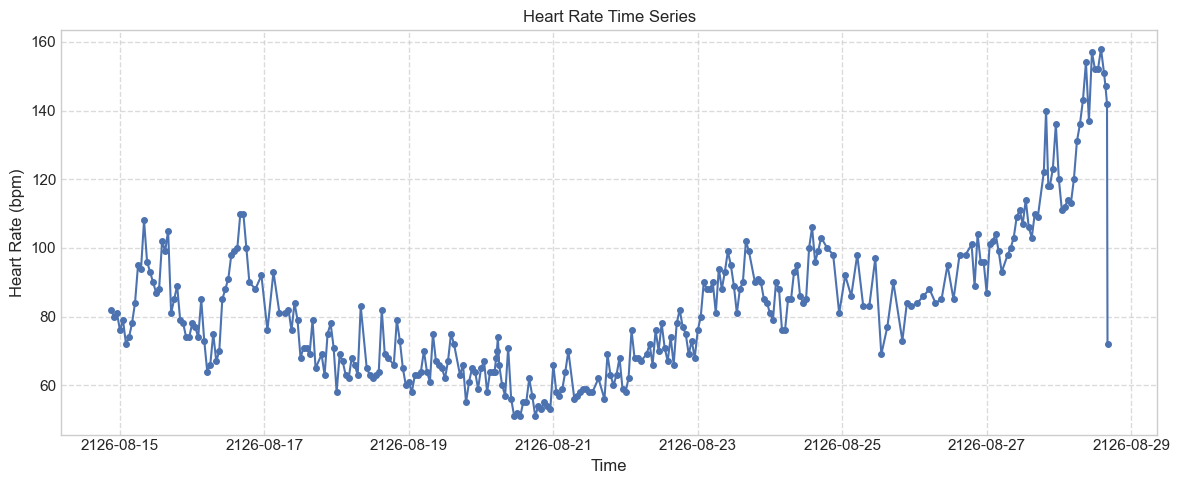


Time Domain Features for Heart Rate:
mean: 80.25783972125436
median: 78.0
std: 18.06814217761319
min: 51.0
max: 140.0
range: 89.0
iqr: 25.5
cv: 0.22512619627398564
trend_slope: 2.5295510942575742e-05
trend_r_squared: 0.22124067307265582
trend_p_value: 3.322733169157261e-17
pct_below_ref: 11.149825783972126
pct_above_ref: 12.89198606271777
pct_in_ref: 75.9581881533101
skew: 0.7253537186588475
kurtosis: 0.25108313684874695


In [55]:
if heart_rate_series is not None and len(heart_rate_series) > 0:
    # Visualize the heart rate time series
    plt.figure(figsize=(12, 5))
    plt.plot(heart_rate_series.index, heart_rate_series.values, 'o-', markersize=4)
    plt.title('Heart Rate Time Series')
    plt.xlabel('Time')
    plt.ylabel('Heart Rate (bpm)')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    
    # Extract time domain features
    time_features = signal_processor.extract_time_domain_features(heart_rate_series, 'heart_rate')
    
    # Display the features
    print("\nTime Domain Features for Heart Rate:")
    for key, value in time_features.items():
        print(f"{key}: {value}")
else:
    print("No heart rate data available for feature extraction")

## 6. Extract Frequency Domain and Wavelet Features

In [56]:
# Continue with heart rate analysis if data is available
if heart_rate_series is not None and len(heart_rate_series) > 10:
    # Extract frequency domain features
    freq_features = signal_processor.extract_frequency_domain_features(
        heart_rate_series, 'heart_rate'
    )
    
    # Extract wavelet features
    wavelet_features = signal_processor.extract_wavelet_features(
        heart_rate_series, 'heart_rate'
    )
    
    # Display frequency domain features
    print("\nFrequency Domain Features for Heart Rate:")
    for key, value in freq_features.items():
        print(f"{key}: {value}")
    
    # Display wavelet features
    print("\nWavelet Features for Heart Rate:")
    for key, value in wavelet_features.items():
        print(f"{key}: {value}")


Frequency Domain Features for Heart Rate:
power_total: 195089758.12586734
freq_peak: 1.0850694444444444e-06
power_peak: 89630391.255045
power_vlf: 0.9117978145681818
power_lf: 0.038448856535139755
power_hf: 0.04975332889667843
lf_hf_ratio: 0.7727896281068065

Wavelet Features for Heart Rate:
wavelet_approx_energy: 2574493.906997967
wavelet_detail1_energy: 7173.04472794284
wavelet_detail2_energy: 4178.230163066112
wavelet_detail3_energy: 4701.986033789949
wavelet_detail4_energy: 7058.51429629861
wavelet_approx_energy_norm: 0.9911026622018498
wavelet_detail1_energy_norm: 0.0027614063123757495
wavelet_detail2_energy_norm: 0.0016084928484976068
wavelet_detail3_energy_norm: 0.0018101230937303653
wavelet_detail4_energy_norm: 0.002717315543546514


## 7. Calculate Stability Metrics

In [57]:
# Calculate stability metrics if we have enough data
if heart_rate_series is not None and len(heart_rate_series) > 10:
    # Calculate stability metrics
    stability_metrics = signal_processor.calculate_stability_metrics(
        heart_rate_series, 'heart_rate'
    )
    
    # Display stability metrics
    print("\nStability Metrics for Heart Rate:")
    for key, value in stability_metrics.items():
        print(f"{key}: {value}")
    
    # If we have enough data points, calculate sample entropy
    if len(heart_rate_series) >= 100:
        sample_entropy = signal_processor.calculate_sample_entropy(heart_rate_series.values)
        print(f"\nSample Entropy: {sample_entropy}")
        print("(Lower values indicate more regularity, higher values indicate more complexity/randomness)")


Stability Metrics for Heart Rate:
autocorr_lag1: 0.8853061283842865
autocorr_decay: 0.12957156559405947
sample_entropy: 1.288270200404326
rmssd: 8.639233972775806
pnn50: 93.7062937062937

Sample Entropy: 1.0316808282918748
(Lower values indicate more regularity, higher values indicate more complexity/randomness)


## 8. Process All Patient Vital Signs

In [58]:
# Process all vital signs for this patient
print("\nProcessing all vital signs for this patient...")
patient_features = signal_processor.process_vital_signs(timeline_df)

# Display the number of features extracted
print(f"Extracted {len(patient_features)} features from patient vital signs")

# Display a sample of the features
feature_sample = {k: patient_features[k] for k in list(patient_features.keys())[:10]}
print("\nSample of extracted features:")
for key, value in feature_sample.items():
    print(f"{key}: {value}")


Processing all vital signs for this patient...
Extracted 313 features from patient vital signs

Sample of extracted features:
sbp_mean: 111.24642857142857
sbp_median: 111.0
sbp_std: 8.277013215687012
sbp_min: 75.0
sbp_max: 135.0
sbp_range: 60.0
sbp_iqr: 11.0
sbp_cv: 0.07440250731620159
sbp_trend_slope: 7.962008411042041e-06
sbp_trend_r_squared: 0.11214273010329763


## 9. Calculate Organ System Status

In [59]:
# Calculate organ system status based on the extracted features
organ_status = signal_processor.calculate_organ_system_status(patient_features)

# Display organ system status
print("\nOrgan System Status:")
for system, status in organ_status.items():
    print(f"\n{system.title()} System:")
    for metric, value in status.items():
        print(f"  {metric}: {value}")


Organ System Status:

Cardiovascular System:
  n_measures: 4
  abnormal_measures: 1
  avg_deviation: 0.03633928571428573
  max_deviation: 0.1453571428571429
  system_score: 0.07040736607142858

Respiratory System:
  n_measures: 2
  abnormal_measures: 0
  avg_deviation: 0.0
  max_deviation: 0
  system_score: 0.0

Renal System:
  n_measures: 1
  abnormal_measures: 1
  avg_deviation: 0.061403508771929835
  max_deviation: 0.061403508771929835
  system_score: 0.06140350877192983

Metabolic System:
  n_measures: 2
  abnormal_measures: 0
  avg_deviation: 0.0
  max_deviation: 0
  system_score: 0.0


## 10. Calculate Allostatic Load

In [60]:
# Calculate overall allostatic load
allostatic_load = signal_processor.calculate_allostatic_load(organ_status)

print(f"\nAllostatic Load: {allostatic_load}")
print("(Higher values indicate greater physiological stress)")


Allostatic Load: 0.19892781389787761
(Higher values indicate greater physiological stress)


## 11. Process Complete Patient Timeline

In [61]:
import importlib
import src.signal_processing
importlib.reload(src.signal_processing)
from src.signal_processing import PhysiologicalSignalProcessor

# Create a new instance
signal_processor = PhysiologicalSignalProcessor()

Initialized PhysiologicalSignalProcessor
- 29 clinical measures with reference ranges
- 8 organ systems defined
- 41 MIMIC itemIDs mapped to standard names


In [62]:
# Process the complete patient timeline
print("\nProcessing complete patient timeline...")
timeline_results = signal_processor.process_patient_timeline(patient_timeline)

# Display the results
print(f"Patient ID: {timeline_results['patient_id']}")
print(f"Number of features: {len(timeline_results['features'])}")
print(f"Number of organ systems evaluated: {len(timeline_results['organ_status'])}")
print(f"Allostatic load: {timeline_results['allostatic_load']}")


Processing complete patient timeline...
Patient ID: 10011
Number of features: 313
Number of organ systems evaluated: 4
Allostatic load: 0.19892781389787761


In [63]:
# More thorough module reload
import sys
import importlib

# Remove the module from sys.modules to force a complete reload
if 'src.signal_processing' in sys.modules:
    del sys.modules['src.signal_processing']

# Import the module fresh
import src.signal_processing
from src.signal_processing import PhysiologicalSignalProcessor

# Create a new instance
signal_processor = PhysiologicalSignalProcessor()

# Verify the method exists now
print("Has analyze_physiological_stability:", hasattr(signal_processor, "analyze_physiological_stability"))

Initialized PhysiologicalSignalProcessor
- 29 clinical measures with reference ranges
- 8 organ systems defined
- 41 MIMIC itemIDs mapped to standard names
Has analyze_physiological_stability: True


## 12. Analyze Physiological Stability Over Time

In [64]:
# Analyze stability over time using sliding windows
print("\nAnalyzing physiological stability over time...")
stability_over_time = signal_processor.analyze_physiological_stability(
    patient_timeline, window_hours=24, step_hours=8
)

# Display the results
if not stability_over_time.empty:
    print(f"Created {len(stability_over_time)} time windows for analysis")
    print("\nStability metrics over time:")
    print(stability_over_time[['window_start', 'window_end', 'data_points', 'allostatic_load']].head())
else:
    print("Not enough data for time window analysis")


Analyzing physiological stability over time...


C:\Users\alex5\Documents\Projects\MIMIC_III\biodynamics\src\signal_processing.py:299: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  features['skew'] = stats.skew(clean_series)
C:\Users\alex5\Documents\Projects\MIMIC_III\biodynamics\src\signal_processing.py:300: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  features['kurtosis'] = stats.kurtosis(clean_series)
C:\Users\alex5\Documents\Projects\MIMIC_III\biodynamics\src\signal_processing.py:364: RuntimeWarning: invalid value encountered in scalar divide
  features['power_vlf'] = np.sum(psd[:vlf_idx]) / features['power_total']
C:\Users\alex5\Documents\Projects\MIMIC_III\biodynamics\src\signal_processing.py:368: RuntimeWarning: invalid value encountered in scalar divide
  features['power_lf']

Created 39 time windows for analysis

Stability metrics over time:
         window_start          window_end  data_points  allostatic_load
0 2126-08-14 21:00:00 2126-08-15 21:00:00          900         0.238901
1 2126-08-15 05:00:00 2126-08-16 05:00:00          880         0.224149
2 2126-08-15 13:00:00 2126-08-16 13:00:00          898         0.156930
3 2126-08-15 21:00:00 2126-08-16 21:00:00          977         0.137080
4 2126-08-16 05:00:00 2126-08-17 05:00:00          726         0.122114


## 13. Create Comprehensive Stability Report

In [65]:
# More thorough module reload
import sys
import importlib

# Remove the module from sys.modules to force a complete reload
if 'src.signal_processing' in sys.modules:
    del sys.modules['src.signal_processing']

# Import the module fresh
import src.signal_processing
from src.signal_processing import PhysiologicalSignalProcessor

# Create a new instance
signal_processor = PhysiologicalSignalProcessor()

# Verify the method exists now
print("Has create_stability_report:", hasattr(signal_processor, "create_stability_report"))

Initialized PhysiologicalSignalProcessor
- 29 clinical measures with reference ranges
- 8 organ systems defined
- 41 MIMIC itemIDs mapped to standard names
Has create_stability_report: True


In [66]:
# Create a comprehensive stability report
print("\nCreating comprehensive stability report...")
stability_report = signal_processor.create_stability_report(patient_timeline)

# Display report components
print("\nStability Report Components:")
for key, value in stability_report.items():
    if key != 'stability_over_time' and key != 'overall_results':
        print(f"{key}: {type(value)}")
    else:
        print(f"{key}: {type(value)} with {len(value)} items")

# Display critical values if any
if stability_report['critical_values']:
    print("\nCritical Values:")
    for cv in stability_report['critical_values']:
        print(f"  {cv['measurement']}: {cv['value']} (Reference: {cv['reference_range']})")


Creating comprehensive stability report...


C:\Users\alex5\Documents\Projects\MIMIC_III\biodynamics\src\signal_processing.py:299: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  features['skew'] = stats.skew(clean_series)
C:\Users\alex5\Documents\Projects\MIMIC_III\biodynamics\src\signal_processing.py:300: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  features['kurtosis'] = stats.kurtosis(clean_series)
C:\Users\alex5\Documents\Projects\MIMIC_III\biodynamics\src\signal_processing.py:364: RuntimeWarning: invalid value encountered in scalar divide
  features['power_vlf'] = np.sum(psd[:vlf_idx]) / features['power_total']
C:\Users\alex5\Documents\Projects\MIMIC_III\biodynamics\src\signal_processing.py:368: RuntimeWarning: invalid value encountered in scalar divide
  features['power_lf']


Stability Report Components:
patient_info: <class 'dict'>
overall_results: <class 'dict'> with 5 items
stability_over_time: <class 'pandas.core.frame.DataFrame'> with 39 items
organ_system_summary: <class 'dict'>
critical_values: <class 'list'>
stability_trends: <class 'dict'>


## 14. Visualize Vital Sign Timeline


Creating heart rate timeline visualization...


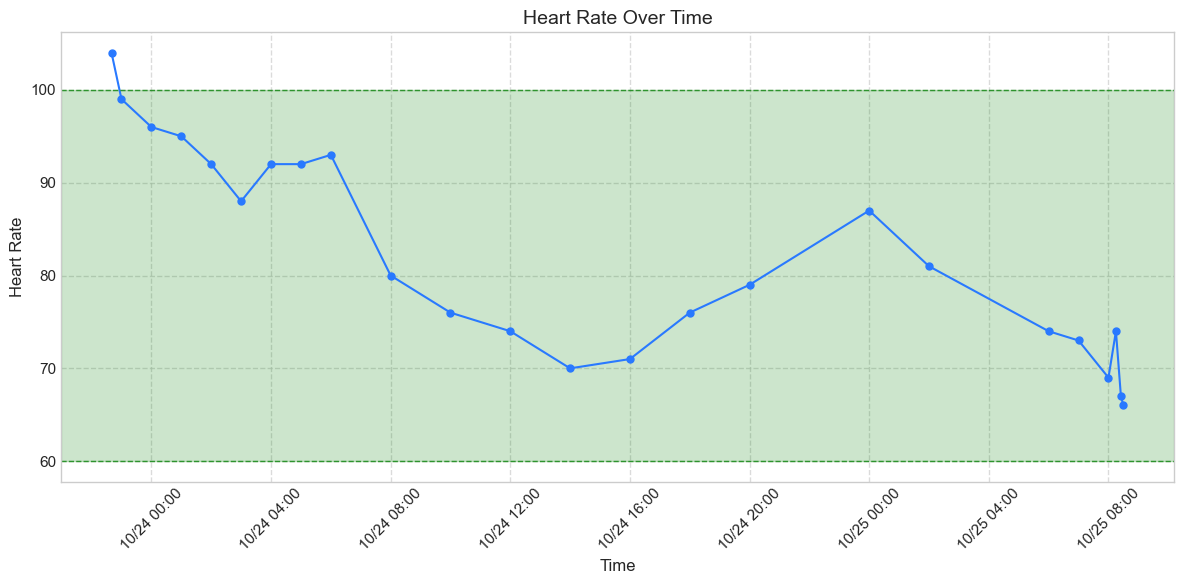

In [41]:
# Visualize heart rate timeline
if heart_rate_series is not None and len(heart_rate_series) > 0:
    print("\nCreating heart rate timeline visualization...")
    # Create DataFrame with heart_rate as a column and reset_index to make measurement_time a column
    heart_rate_data = pd.DataFrame({'heart_rate': heart_rate_series}).reset_index()
    heart_rate_data.rename(columns={'index': 'measurement_time'}, inplace=True)
    hr_fig = visualizer.plot_vital_sign_timeline(heart_rate_data, 'heart_rate')
    plt.show()

## 15. Create Multi-Vital Timeline

In [50]:
# Visualize multiple vital signs
vital_signs_to_plot = []

# Check which vital signs are available
possible_vitals = ['heart_rate', 'respiratory_rate', 'sbp', 'dbp', 'temperature', 'o2_saturation']
for vital in possible_vitals:
    if vital in timeline_df.columns and timeline_df[vital].notna().sum() > 5:
        vital_signs_to_plot.append(vital)

if vital_signs_to_plot:
    print(f"\nCreating multi-vital timeline for: {', '.join(vital_signs_to_plot)}")
    multi_vital_fig = visualizer.plot_multi_vital_timeline(timeline_df, vital_signs_to_plot)
    plt.show()
else:
    print("\nNot enough vital sign data for multi-vital timeline")


Not enough vital sign data for multi-vital timeline


## 16. Create Organ System Radar Plot


Creating organ system radar plot...


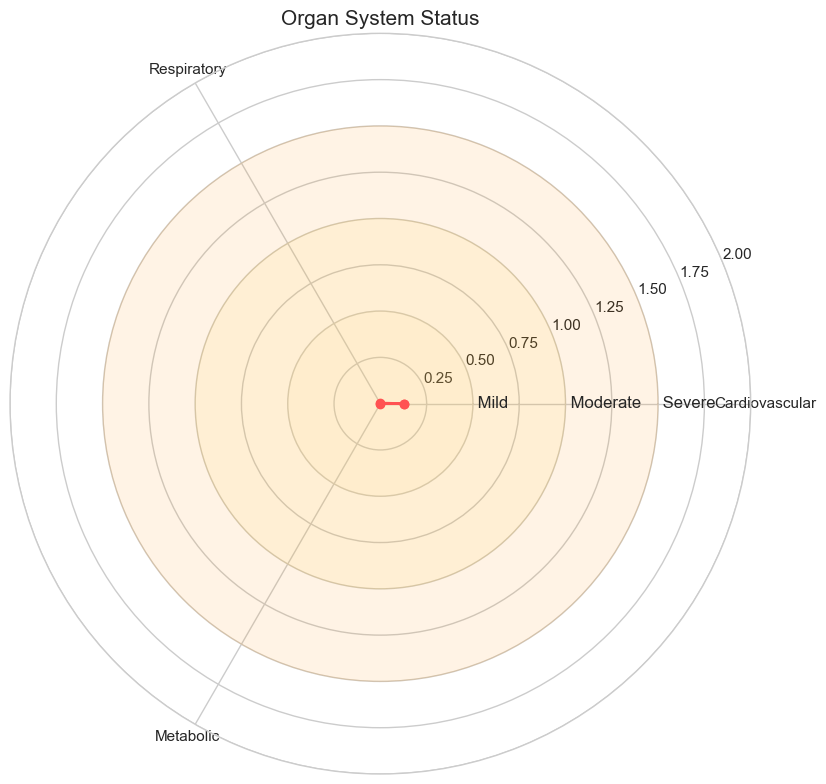

In [51]:
# Create organ system radar plot
print("\nCreating organ system radar plot...")
radar_fig = visualizer.plot_organ_system_radar(stability_report)
plt.show()

## 17. Plot Allostatic Load Trend


Creating allostatic load trend plot...


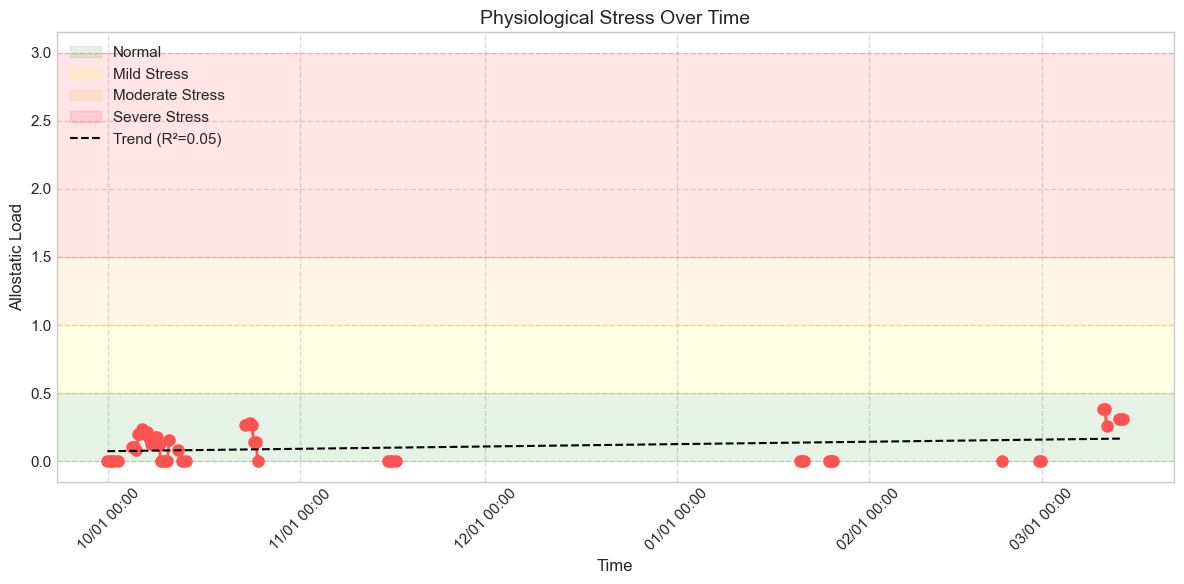

In [45]:
# Plot allostatic load trend if we have time windows
if 'stability_over_time' in stability_report and not stability_report['stability_over_time'].empty:
    print("\nCreating allostatic load trend plot...")
    trend_fig = visualizer.plot_allostatic_load_trend(stability_report['stability_over_time'])
    plt.show()
else:
    print("\nNot enough data for allostatic load trend plot")

## 18. Create Phase Portrait

In [46]:
# Check if we have heart rate and blood pressure for phase portrait
if all(v in timeline_df.columns for v in ['heart_rate', 'sbp']):
    # Filter for rows with both values
    phase_data = timeline_df[['measurement_time', 'heart_rate', 'sbp']].dropna()
    
    if len(phase_data) >= 5:
        print("\nCreating phase portrait of heart rate vs. blood pressure...")
        phase_fig = visualizer.plot_phase_portrait(phase_data, 'heart_rate', 'sbp')
        plt.show()
        
        # If we also have respiratory rate, create a 3D phase portrait
        if 'respiratory_rate' in timeline_df.columns:
            phase_data_3d = timeline_df[['measurement_time', 'heart_rate', 'sbp', 'respiratory_rate']].dropna()
            
            if len(phase_data_3d) >= 5:
                print("\nCreating 3D phase portrait with respiratory rate...")
                phase_3d_fig = visualizer.plot_phase_portrait(
                    phase_data_3d, 'heart_rate', 'sbp', 'respiratory_rate'
                )
                plt.show()
    else:
        print("\nNot enough data for phase portrait")
else:
    print("\nMissing vital signs for phase portrait")


Missing vital signs for phase portrait


## 19. Create Organ System Heatmap


Creating organ system heatmap...


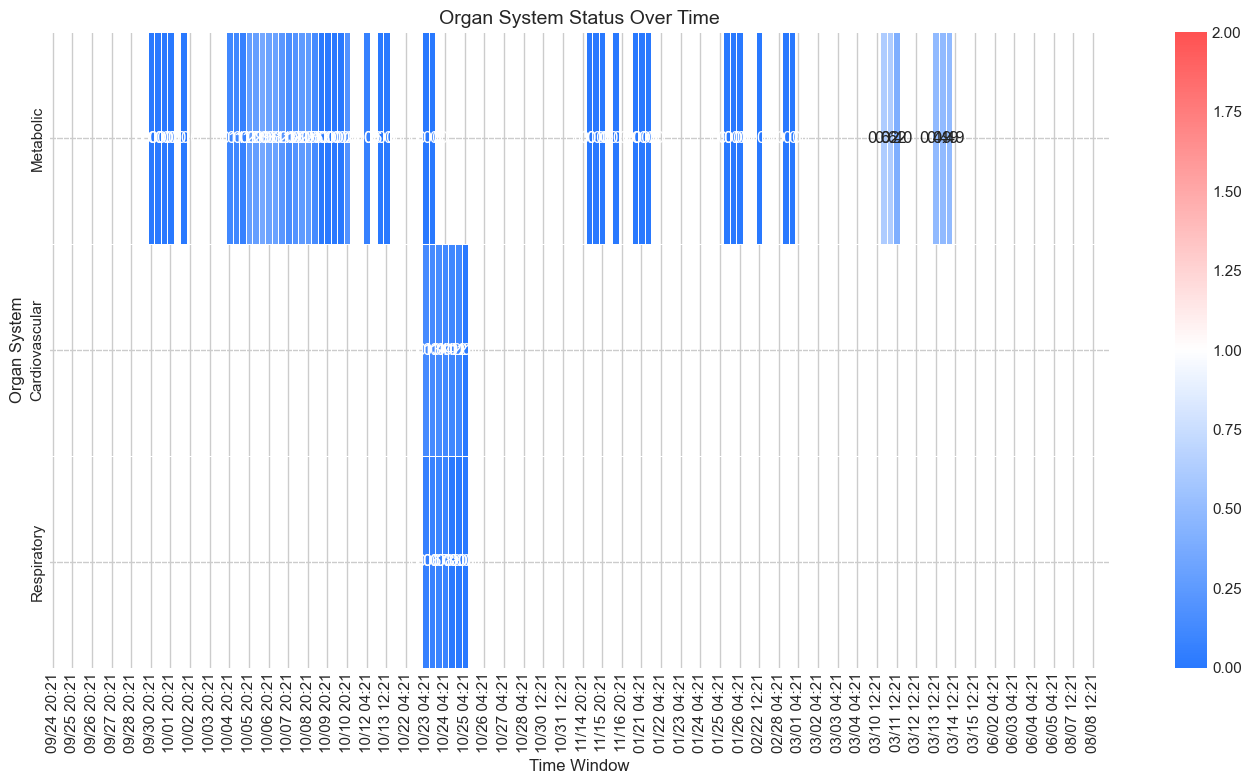

In [47]:
# Create organ system heatmap if we have time windows
if 'stability_over_time' in stability_report and not stability_report['stability_over_time'].empty:
    print("\nCreating organ system heatmap...")
    heatmap_fig = visualizer.plot_organ_system_heatmap(stability_report['stability_over_time'])
    plt.show()
else:
    print("\nNot enough data for organ system heatmap")

## 20. Create Comprehensive Patient Dashboard


Creating comprehensive patient dashboard...


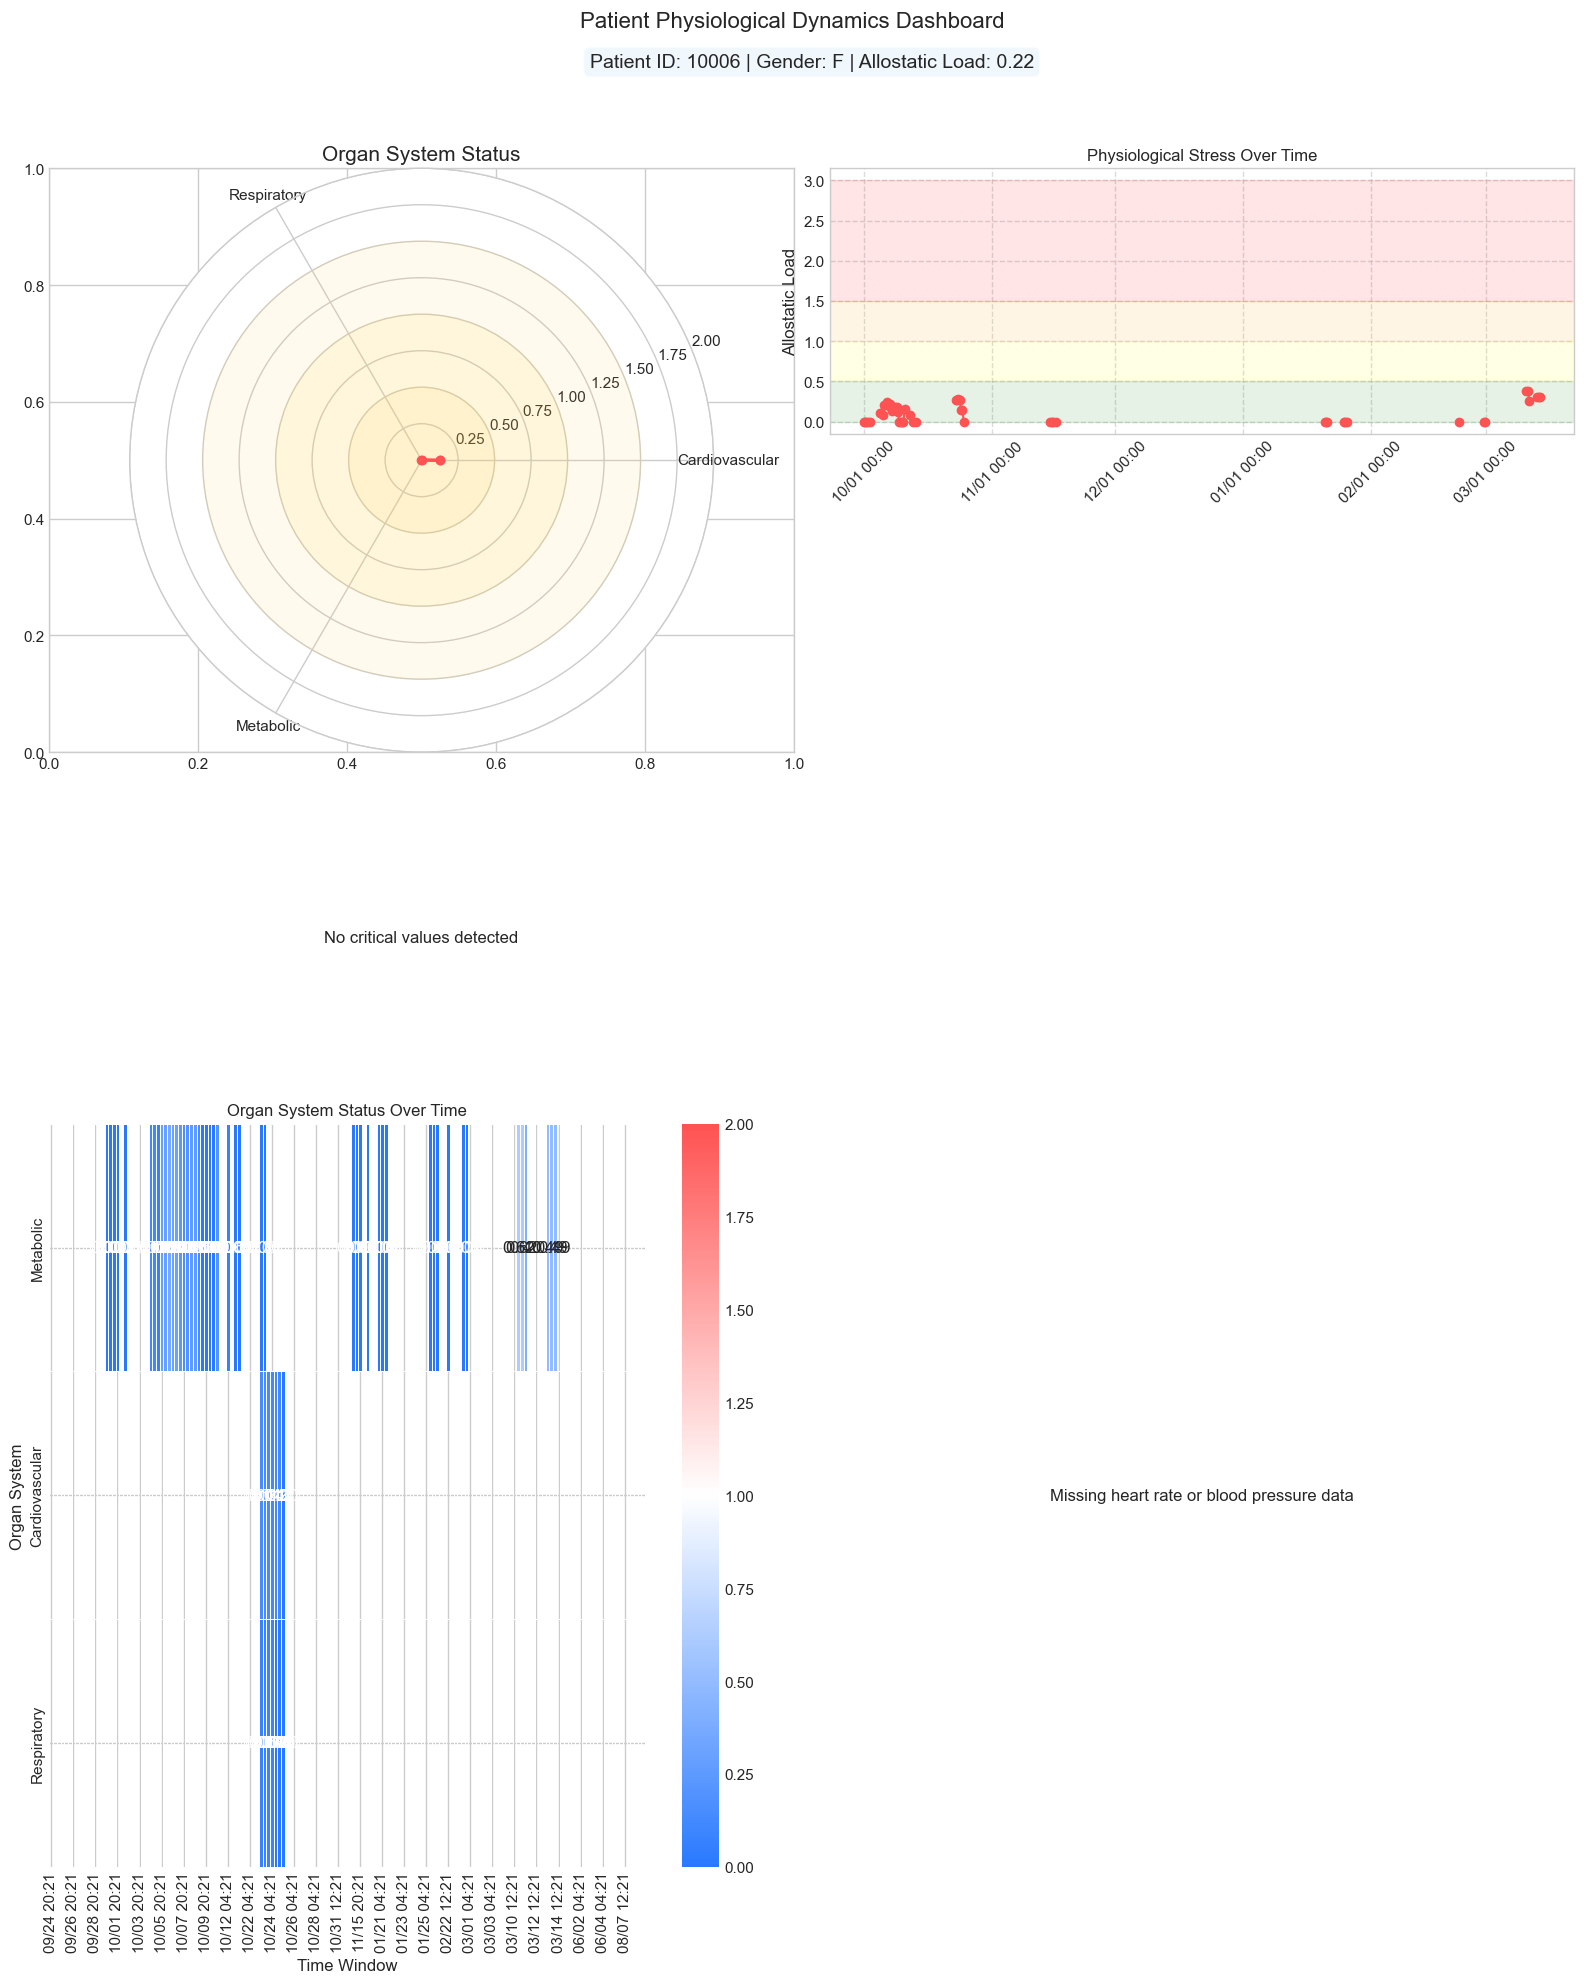

In [48]:
# Create comprehensive patient dashboard
print("\nCreating comprehensive patient dashboard...")
dashboard_fig = visualizer.create_patient_dashboard(patient_timeline, stability_report)
plt.show()

## 21. Summary

In [49]:
# Visualize heart rate timeline
print("\n=== BioDynamICS Analysis Summary ===")
print(f"Patient ID: {patient_timeline['info']['subject_id']}")
print(f"Total events analyzed: {len(patient_timeline['timeline'])}")
print(f"Features extracted: {len(timeline_results['features'])}")
print(f"Organ systems evaluated: {len(timeline_results['organ_status'])}")
print(f"Allostatic load: {timeline_results['allostatic_load']:.2f}")

if stability_report['critical_values']:
    print(f"Critical values detected: {len(stability_report['critical_values'])}")
else:
    print("No critical values detected")

if 'stability_trends' in stability_report and stability_report['stability_trends']:
    trend = stability_report['stability_trends'].get('allostatic_load_trend', 0)
    if trend > 0.05:
        print("Stability trend: DETERIORATING")
    elif trend < -0.05:
        print("Stability trend: IMPROVING")
    else:
        print("Stability trend: STABLE")
    
print("\nBioDynamICS analysis complete!")


=== BioDynamICS Analysis Summary ===
Patient ID: 10006
Total events analyzed: 2937
Features extracted: 250
Organ systems evaluated: 3
Allostatic load: 0.22
No critical values detected
Stability trend: STABLE

BioDynamICS analysis complete!
